In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

### Multivariate linear regression

In [2]:
import pandas as pd

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('./BRinf')
df.head()

Unnamed: 0  Brazil CPI IPCA MoM  FGV Brazil General Prices IGP-  \
0  2003-01-31                 2.25                            2.33   
1  2003-02-28                 1.57                            2.28   
2  2003-03-31                 1.23                            1.53   
3  2003-04-30                 0.97                            0.92   
4  2003-05-31                 0.61                           -0.26   

   FGV Brazil General Prices IGP-.1  FGV Brazil General Prices IGP-.2  \
0                              2.17                             5.816   
1                              1.59                             4.351   
2                              1.66                             4.593   
3                              0.41                             1.173   
4                             -0.67                            -1.860   

   FGV Brazil General Prices IGP-.3  Brazil CPI IPCA Median Market  \
0                              2.29                          11.56   
1                              2.42                          10.95   
2                              1.58                           9.58   
3                              1.24                           8.88   
4                              0.02                           8.22   

   Brazil Total Electricity Consu  Brazil Industrial Electricity  \
0                         25422.0                           -359   
1                         25163.0                           -303   
2                         24960.0                            115   
3                         25284.0                             93   
4                         24785.0                            285   

   BofA Merrill Lynch Economic Co  ...  X5t.12  X5t.13   fmed2  fmean  fmean2  \
0                           -1.47  ...    0.80    0.68  4.0000   1.96  3.8416   
1                           -1.21  ...    0.68    0.48  2.5600   1.60  2.5600   
2                           -0.35  ...    0.55    0.50  0.8836   0.93  0.8649   
3                           -0.15  ...    0.45    0.78  1.0000   0.97  0.9409   
4                           -0.47  ...    0.60    0.43  0.2500   0.50  0.2500   

    fdp  lfmed2  lfmean  lfmean2  lfdp  
0  0.18  1.3225    1.15   1.3225  0.24  
1  0.26  0.7569    0.91   0.8281  0.27  
2  0.13  0.4900    0.73   0.5329  0.17  
3  0.14  0.2500    0.52   0.2704  0.18  
4  0.10  0.3025    0.55   0.3025  0.15  

[5 rows x 93 columns]

In [4]:
# number of observations, number of variables
df.shape

(156, 93)

In [5]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
Y_train = df.iloc[0:nb_data_train,1] 
Y_test  = df.iloc[-nb_diff:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [6]:
# other variables
X_train = df.iloc[0:nb_data_train,2:] 
X_test  = df.iloc[-nb_diff:,2:] 
X_test.head()

FGV Brazil General Prices IGP-  FGV Brazil General Prices IGP-.1  \
140                            0.20                              0.02   
141                            0.28                              0.59   
142                            0.98                              1.14   
143                            0.62                              0.38   
144                            0.76                              0.67   

     FGV Brazil General Prices IGP-.2  FGV Brazil General Prices IGP-.3  \
140                             0.110                              0.31   
141                             3.158                              0.02   
142                             6.098                              0.82   
143                             2.089                              0.98   
144                             3.672                              0.42   

     Brazil CPI IPCA Median Market  Brazil Total Electricity Consu  \
140                           6.34                         38551.0   
141                           6.38                         38798.0   
142                           6.57                         40100.0   
143                           6.67                         40950.0   
144                           7.01                         39673.0   

     Brazil Industrial Electricity  BofA Merrill Lynch Economic Co  \
140                            580                           -0.22   
141                           -266                           -0.63   
142                             61                           -0.76   
143                            327                           -1.48   
144                           -773                           -0.82   

     CNI Brazil Manufacture Industr  CNI Brazil Manufacture Industr.1  ...  \
140                            -0.1                              81.8  ...   
141                             0.3                              82.3  ...   
142                            -0.6                              82.6  ...   
143                            -0.1                              82.0  ...   
144                            -0.2                              78.6  ...   

     X5t.12  X5t.13   fmed2  fmean  fmean2   fdp  lfmed2  lfmean  lfmean2  \
140    0.35    0.41  0.1849   0.43  0.1849  0.04  0.2500    0.49   0.2401   
141    0.40    0.53  0.2500   0.50  0.2500  0.04  0.3249    0.58   0.3364   
142    0.52    0.64  0.3025   0.59  0.3481  0.05  0.5476    0.72   0.5184   
143    0.64    0.71  0.4900   0.75  0.5625  0.05  0.9409    0.97   0.9409   
144    0.72    0.69  1.9600   1.18  1.3924  0.11  1.0201    0.99   0.9801   

     lfdp  
140  0.05  
141  0.05  
142  0.08  
143  0.12  
144  0.16  

[5 rows x 91 columns]

In [7]:
from sklearn import linear_model
reg_lin = linear_model.Ridge(alpha= 0.0)

In [8]:
#Fit the linear regression model i.e. estimate the unknown parameters 
# using the data in the training set
reg_lin.fit(X_train, Y_train)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
#Display the estimated coefficients of the linear regression
reg_lin.coef_

array([ 1.37727533e-01,  8.67075316e-03,  4.10751667e-03, -1.92476852e-01,
       -8.68014175e-02,  5.54886063e-06, -2.58888749e-05,  6.04462631e-04,
       -3.25434931e-02,  3.29081994e-04,  4.34631342e-03, -3.98765924e-04,
       -1.76703047e-01,  8.62080155e-04,  6.00120025e-04, -1.75953266e-02,
        3.91753442e-02, -1.03639428e-02,  1.06902531e-04, -4.95189359e-04,
       -3.94114793e-05, -1.59026053e-01,  1.52267431e-01,  4.11597702e-07,
       -2.00111435e-01, -6.17548976e-06,  9.92499976e-02, -3.62646623e-02,
        1.96548581e-02, -2.17783413e-02, -9.75254382e-04,  6.78458732e-04,
        2.24188720e-03, -4.64575963e-02,  1.16364609e-02,  3.35603191e-02,
        2.23562181e-04, -4.43366686e+00,  1.99448645e-02,  4.49877002e-02,
       -1.44327094e-02,  2.74507537e-01, -1.63776208e-05, -5.10860120e-08,
       -1.17173474e-01,  1.29516301e-03,  6.85338579e-02,  5.92482251e-02,
       -1.30076439e-01,  1.72326805e-02, -1.09424354e-01, -1.63048338e+00,
        1.76123412e-04, -

In [10]:
#Compute the prediction of the observations using the input data et the parameter estimate
y_hat_lin = reg_lin.predict(X_train)

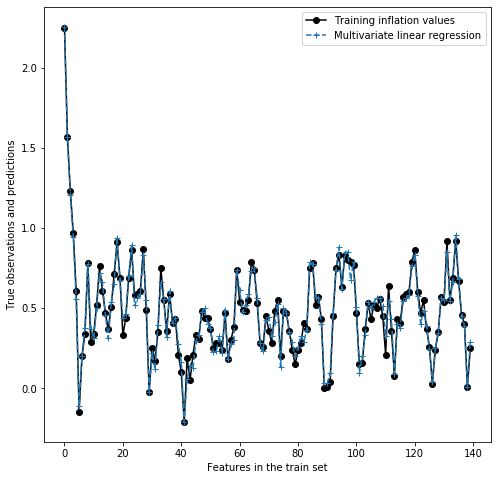

In [11]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values,marker='o',color='k')
plt.plot(y_hat_lin,'o--',marker='+')
plt.legend(labels=('Training inflation values','Multivariate linear regression'))

In [12]:
y_hat_lin = reg_lin.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(y_hat_lin,Y_test.values)

0.39813343733301065

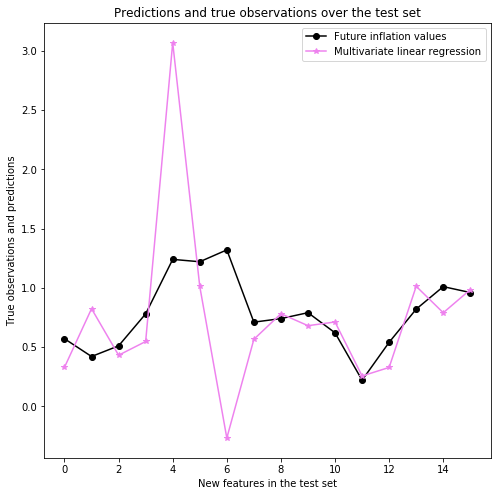

In [15]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the test set")
plt.xlabel("New features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values,marker='o',color='k')
plt.plot(y_hat_lin,marker='*',color='violet')
plt.legend(labels=('Future inflation values','Multivariate linear regression'))

### Train test split

In [16]:
# Here we split the dataset using 90% to train the model and estimate the parameters and 10% 
# test the quality of predictions 
from sklearn.model_selection import train_test_split

In [18]:
mse_train = []
mse_test = []
reg_lin = linear_model.Ridge(alpha= 0.0)
for iteration in range(50):
    #Random split between train and test
    train, test = train_test_split(df, test_size=0.1)
    X_train = train.iloc[:,2:20] 
    X_test = test.iloc[:,2:20] 
    Y_train  = train.iloc[:,1] 
    Y_test  = test.iloc[:,1] 
    # Estimate parameters
    reg_lin.fit(X_train, Y_train)
    # Predictions using test data
    y_hat_lin = reg_lin.predict(X_test)
    mse_test = np.append(mse_test,mean_squared_error(y_hat_lin,Y_test.values))
    # Predictions using training data
    y_hat_lin = reg_lin.predict(X_train)
    mse_train = np.append(mse_train,mean_squared_error(y_hat_lin,Y_train.values))

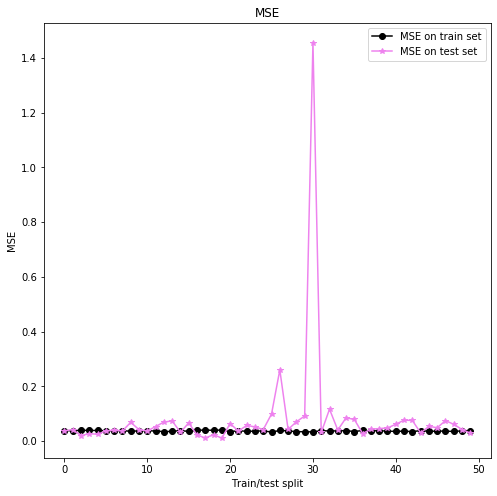

In [19]:
plt.figure(1,figsize=(8,8))
plt.title("MSE")
plt.xlabel("Train/test split")
plt.ylabel('MSE')
plt.plot(mse_train,marker='o',color='k')
plt.plot(mse_test,marker='*',color='violet')
plt.legend(labels=('MSE on train set','MSE on test set'))

### Ridge regression

In [20]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
Y_train = df.iloc[0:nb_data_train,1] 
Y_test  = df.iloc[-nb_diff:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [21]:
# other variables
X_train = df.iloc[0:nb_data_train,2:] 
X_test  = df.iloc[-nb_diff:,2:] 
X_test.head()

FGV Brazil General Prices IGP-  FGV Brazil General Prices IGP-.1  \
140                            0.20                              0.02   
141                            0.28                              0.59   
142                            0.98                              1.14   
143                            0.62                              0.38   
144                            0.76                              0.67   

     FGV Brazil General Prices IGP-.2  FGV Brazil General Prices IGP-.3  \
140                             0.110                              0.31   
141                             3.158                              0.02   
142                             6.098                              0.82   
143                             2.089                              0.98   
144                             3.672                              0.42   

     Brazil CPI IPCA Median Market  Brazil Total Electricity Consu  \
140                           6.34                         38551.0   
141                           6.38                         38798.0   
142                           6.57                         40100.0   
143                           6.67                         40950.0   
144                           7.01                         39673.0   

     Brazil Industrial Electricity  BofA Merrill Lynch Economic Co  \
140                            580                           -0.22   
141                           -266                           -0.63   
142                             61                           -0.76   
143                            327                           -1.48   
144                           -773                           -0.82   

     CNI Brazil Manufacture Industr  CNI Brazil Manufacture Industr.1  ...  \
140                            -0.1                              81.8  ...   
141                             0.3                              82.3  ...   
142                            -0.6                              82.6  ...   
143                            -0.1                              82.0  ...   
144                            -0.2                              78.6  ...   

     X5t.12  X5t.13   fmed2  fmean  fmean2   fdp  lfmed2  lfmean  lfmean2  \
140    0.35    0.41  0.1849   0.43  0.1849  0.04  0.2500    0.49   0.2401   
141    0.40    0.53  0.2500   0.50  0.2500  0.04  0.3249    0.58   0.3364   
142    0.52    0.64  0.3025   0.59  0.3481  0.05  0.5476    0.72   0.5184   
143    0.64    0.71  0.4900   0.75  0.5625  0.05  0.9409    0.97   0.9409   
144    0.72    0.69  1.9600   1.18  1.3924  0.11  1.0201    0.99   0.9801   

     lfdp  
140  0.05  
141  0.05  
142  0.08  
143  0.12  
144  0.16  

[5 rows x 91 columns]

In [27]:
# Model with Ridge regularization and automatic selection of the penalty parameter
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 20))
# Standard linear regression
reg_lin = linear_model.Ridge(alpha= 0.0)

In [28]:
# Train both models
reg.fit(X_train, Y_train)
reg_lin.fit(X_train, Y_train)
y_hat = reg.predict(X_train)
y_hat_lin = reg_lin.predict(X_train)

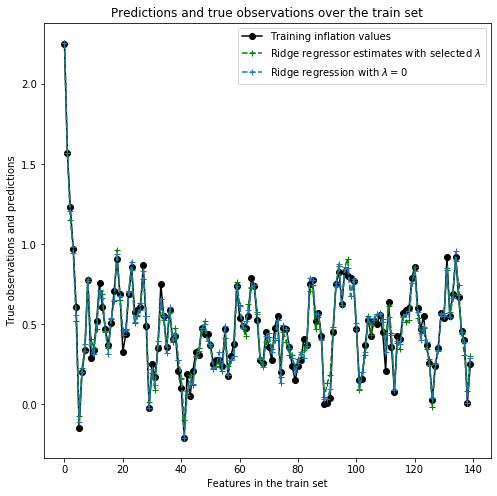

In [29]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the train set")
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values,marker='o',color='k')
plt.plot(y_hat,'g--',marker='+')
plt.plot(y_hat_lin,'o--',marker='+')
plt.legend(labels=('Training inflation values',r'Ridge regressor estimates with selected $\lambda$','Ridge regression with $\lambda = 0$'))

In [31]:
# Predictions using the test set
y_hat = reg.predict(X_test)
y_hat_lin = reg_lin.predict(X_test)

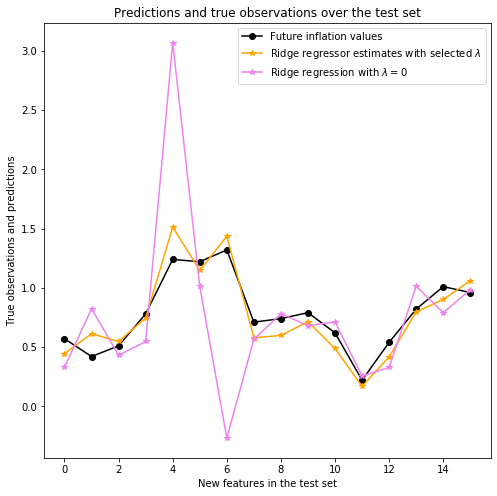

In [32]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the test set")
plt.xlabel("New features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values,marker='o',color='k')
plt.plot(y_hat,marker='*',color='orange')
plt.plot(y_hat_lin,marker='*',color='violet')
plt.legend(labels=('Future inflation values',r'Ridge regressor estimates with selected $\lambda$','Ridge regression with $\lambda = 0$'))

In [33]:
n_alphas = 100
alphas = np.logspace(-10, 2, n_alphas)
coefs = []
rmse = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    y_hat = ridge.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73376e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73378e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73379e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73381e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond

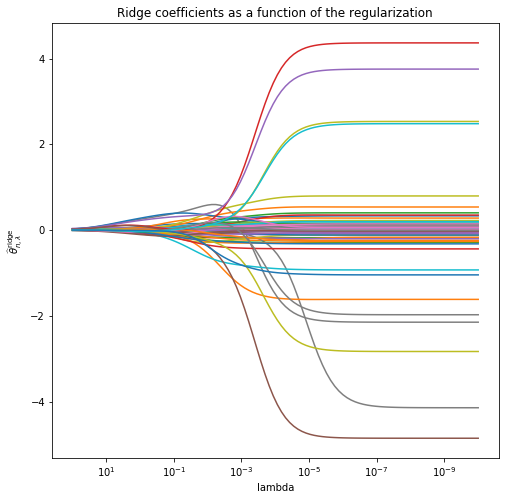

In [34]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{ridge}}_{n,\lambda}$')
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

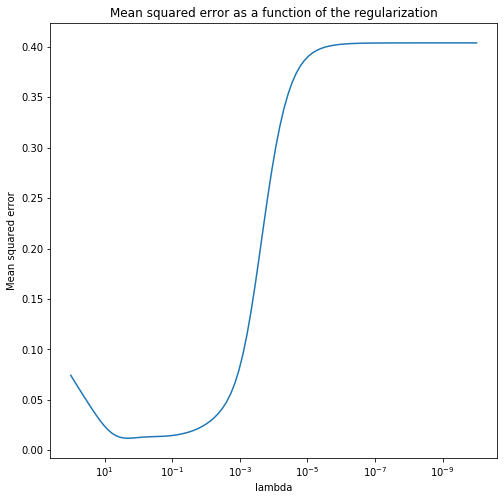

In [35]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, rmse)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()